Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
x = df.iloc[:, [0, 1, 2, 3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

### Columns 

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Values

In [5]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df.shape

(150, 6)

### Null values

In [7]:
df.isnull().mean() * 100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa


## Analysis

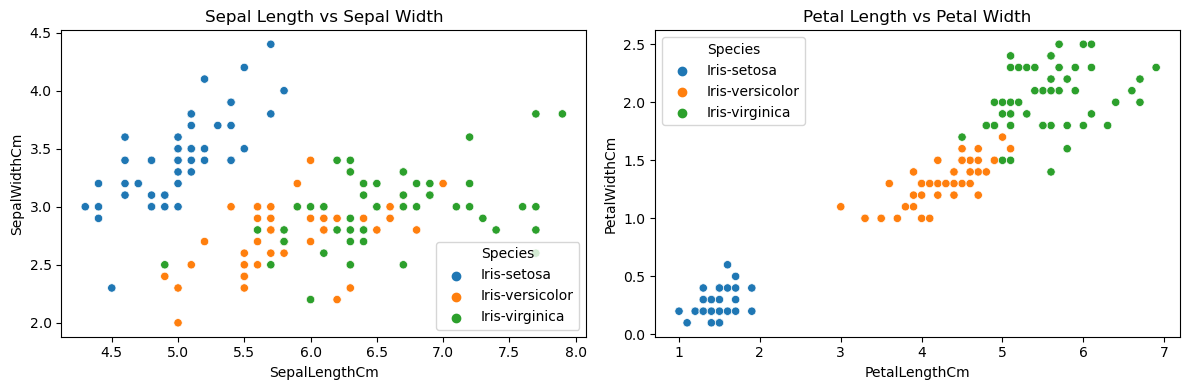

In [10]:
# Create a grid of subplots with 1 row and 2 columns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(x = 'SepalLengthCm',
               y = 'SepalWidthCm', 
               hue = 'Species',
               data = df,
               ax = axes[0])
axes[0].set_title('Sepal Length vs Sepal Width')


sns.scatterplot(x='PetalLengthCm', 
                y='PetalWidthCm', 
                hue='Species', 
                data=df, 
                ax=axes[1])
axes[1].set_title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

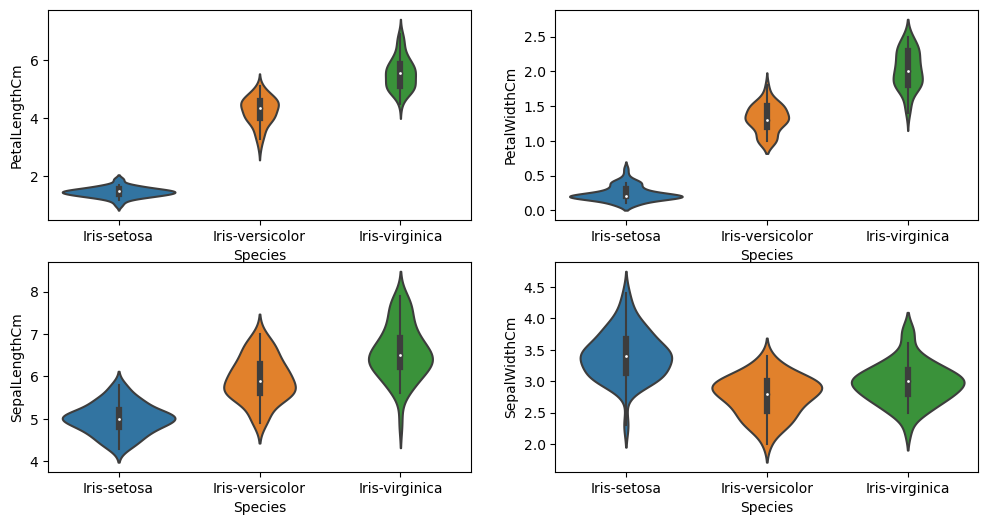

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

#### Now the given problem is a classification problem.. Thus classification algorithms used to build a model.

In [12]:
df = df.drop(['Id'],
             axis = 1)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,5.2,3.5,1.5,0.2,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor
117,7.7,3.8,6.7,2.2,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica


In [13]:
df['Species'] = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### correlation

<AxesSubplot:>

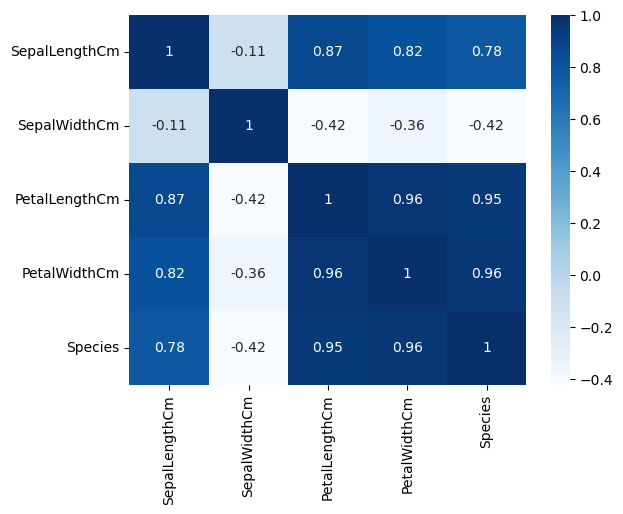

In [14]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

### Scikit learn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [16]:
X = df.iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [18]:
y.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
print(f"shape of X_train is {X_train.shape}")
print(f"shape of X_test is {X_test.shape}",'\n')

print(f"shape of y_train is {y_train.shape}")
print(f"shape of y_test is {y_test.shape}")

shape of X_train is (100, 4)
shape of X_test is (50, 4) 

shape of y_train is (100,)
shape of y_test is (50,)


### LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train) 
prediction=model.predict(X_test) 
print('The accuracy of the Logistic Regression using is:',metrics.accuracy_score(prediction,y_test))


<IPython.core.display.Javascript object>

The accuracy of the Logistic Regression using is: 1.0


In [23]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"accuracy score is {accuracy_score(y_pred, y_test)}")

accuracy score is 1.0


### SVC

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

1.0

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### SVC Hyperparameters

In [28]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
svc.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [29]:
svc.best_params_

{'C': 100, 'gamma': 0.01}

In [30]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2], dtype=int64)

<AxesSubplot:>

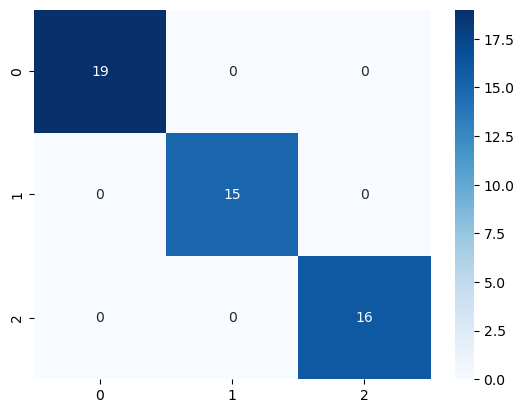

In [31]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

### K-Means

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
wcss = []

for i in range(1, 11):
    try:
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=3, random_state=0)
        kmeans.fit(X_train)
    except AttributeError as e:
        print("Error:", e)
        print("Check data types, handle missing values, and try smaller 'n_clusters' or chunking for large data.")
        break  # Exit the loop if an error occurs

    wcss.append(kmeans.inertia_)


Error: 'NoneType' object has no attribute 'split'
Check data types, handle missing values, and try smaller 'n_clusters' or chunking for large data.
